# Day 9
## Rope Bridge

This rope bridge creaks as you walk along it. You aren't sure how old it is, or whether it can even support your weight.

It seems to support the Elves just fine, though. The bridge spans a gorge which was carved out by the massive river far below you.

You step carefully; as you do, the ropes stretch and twist. You decide to distract yourself by modeling rope physics; maybe you can even figure out where not to step.

Consider a rope with a knot at each end; these knots mark the head and the tail of the rope. If the head moves far enough away from the tail, the tail is pulled toward the head.

Due to nebulous reasoning involving Planck lengths, you should be able to model the positions of the knots on a two-dimensional grid. Then, by following a hypothetical series of motions (your puzzle input) for the head, you can determine how the tail will move.

Due to the aforementioned Planck lengths, the rope must be quite short; in fact, the head (H) and tail (T) must always be touching (diagonally adjacent and even overlapping both count as touching):
```
....
.TH.
....

....
.H..
..T.
....

...
.H. (H covers T)
...
```
If the head is ever two steps directly up, down, left, or right from the tail, the tail must also move one step in that direction so it remains close enough:
```
.....    .....    .....
.TH.. -> .T.H. -> ..TH.
.....    .....    .....

...    ...    ...
.T.    .T.    ...
.H. -> ... -> .T.
...    .H.    .H.
...    ...    ...
```
Otherwise, if the head and tail aren't touching and aren't in the same row or column, the tail always moves one step diagonally to keep up:
```
.....    .....    .....
.....    ..H..    ..H..
..H.. -> ..... -> ..T..
.T...    .T...    .....
.....    .....    .....

.....    .....    .....
.....    .....    .....
..H.. -> ...H. -> ..TH.
.T...    .T...    .....
.....    .....    .....
```
You just need to work out where the tail goes as the head follows a series of motions. Assume the head and the tail both start at the same position, overlapping.

For example:
```
R 4
U 4
L 3
D 1
R 4
D 1
L 5
R 2
```
This series of motions moves the head right four steps, then up four steps, then left three steps, then down one step, and so on. After each step, you'll need to update the position of the tail if the step means the head is no longer adjacent to the tail. Visually, these motions occur as follows (s marks the starting position as a reference point):
```
== Initial State ==

......
......
......
......
H.....  (H covers T, s)

== R 4 ==

......
......
......
......
TH....  (T covers s)

......
......
......
......
sTH...

......
......
......
......
s.TH..

......
......
......
......
s..TH.

== U 4 ==

......
......
......
....H.
s..T..

......
......
....H.
....T.
s.....

......
....H.
....T.
......
s.....

....H.
....T.
......
......
s.....

== L 3 ==

...H..
....T.
......
......
s.....

..HT..
......
......
......
s.....

.HT...
......
......
......
s.....

== D 1 ==

..T...
.H....
......
......
s.....

== R 4 ==

..T...
..H...
......
......
s.....

..T...
...H..
......
......
s.....

......
...TH.
......
......
s.....

......
....TH
......
......
s.....

== D 1 ==

......
....T.
.....H
......
s.....

== L 5 ==

......
....T.
....H.
......
s.....

......
....T.
...H..
......
s.....

......
......
..HT..
......
s.....

......
......
.HT...
......
s.....

......
......
HT....
......
s.....

== R 2 ==

......
......
.H....  (H covers T)
......
s.....

......
......
.TH...
......
s.....
```
After simulating the rope, you can count up all of the positions the tail visited at least once. In this diagram, s again marks the starting position (which the tail also visited) and # marks other positions the tail visited:
```
..##..
...##.
.####.
....#.
s###..
```
So, there are 13 positions the tail visited at least once.

Simulate your complete hypothetical series of motions. **How many positions does the tail of the rope visit at least once?**

## Part 1
### Load head movements

In [1]:
with open("rope_bridge.txt", "r") as f:
    head_movements = [i.rstrip("\n") for i in f.readlines()]

In [2]:
head_movements[:5]

['D 1', 'L 2', 'D 2', 'L 1', 'R 1']

In [ ]:
len(head_movements)

### Calculate head movement amplitude
i.e. the size of the map

In [ ]:
x0, y0, x1, y1 = 0, 0, 0, 0
xmax, xmin, ymax, ymin = 0, 0, 0, 0
for i in head_movements:
    move = i.split()
    if move[0] == "L":
        x1 = x0 - int(move[1])
    if move[0] == "R":
        x1 = x0 + int(move[1])
    if move[0] == "U":
        y1 = y0 + int(move[1])
    if move[0] == "D":
        y1 = y0 - int(move[1])
    if x1 > xmax:
        xmax = x1
    if x1 < xmin:
        xmin = x1
    if y1 > ymax:
        ymax = y1
    if y1 < ymin:
        ymin = y1
    x0, y0 = x1, y1

In [ ]:
xmax, xmin, ymax, ymin

### Create head movement array

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
head_array = np.zeros([400, 1000], dtype=int)
tail_array = np.zeros([400, 1000], dtype=int)
head_array

In [ ]:
head_array.shape

### Control head movement

In [4]:
def move_head(position:list, movement:str, the_array:np.array):
    # take an initial position tuple (as in [line, column]), the movement string 
    # and the array, then updates the head array and outputs the new position
    position0 = position
    direction = movement.split()[0]
    magnitude = int(movement.split()[1])
    #
    match direction:
        case "D":
            position1 = [position0[0] + magnitude, position0[1]]
        case "U":
            position1 = [position0[0] - magnitude, position0[1]]
        case "L":
            position1 = [position0[0], position0[1] - magnitude]
        case "R":
            position1 = [position0[0], position0[1] + magnitude]
    # record head
    record_head_movement(position0, position1, the_array)
    # return
    print(f"Head {position0} moved [{movement}] to {position1}", end="     ")
    return position1

In [5]:
def record_head_movement(initial_position:list, final_position:list, the_array:np.array):
    displacement = np.array(final_position) - np.array(initial_position)
    # down
    if displacement[0] > 0:
        the_array[initial_position[0]:final_position[0]+1, final_position[1]] = 1
    # up
    elif displacement[0] < 0:
        the_array[final_position[0]:initial_position[0]+1, final_position[1]] = 1
    # left
    elif displacement[1] < 0:
        the_array[final_position[0], final_position[1]:initial_position[1]+1] = 1
    # right
    elif displacement[1] > 0:
        the_array[final_position[0], initial_position[1]:final_position[1]+1] = 1

### Control tail movement

In [6]:
def tail_needs_moving(tail_position:list, head_position:list):
    delta = abs(np.array(head_position) - np.array(tail_position))
    if sum(delta) > 1 and (delta[0] > 1 or delta[1] > 1):
        return True
    else:
        return False

In [7]:
def number_intermediate_steps(tail_position:list, head_position:list):
    delta = np.array(head_position) - np.array(tail_position)
    return max(abs(delta)) + 1

In [8]:
def move_tail(tail_position:list, head_position:list, the_array:np.array):
    new_tail_position = tail_position.copy()
    # only moves TAIL if it's required
    if tail_needs_moving(tail_position, head_position):       
        # find the difference between final HEAD and initial TAIL
        delta = np.array(head_position) - np.array(tail_position)   
        # if vertical difference is smaller than horizontal difference, ...
        if abs(delta[0]) < abs(delta[1]):
            # ... final TAIL line = final HEAD line
            # and final TAIL column neighbours final HEAD column
            # (to HEAD's left or right depending on TAIL initial position)
            new_tail_position[0], new_tail_position[1] = head_position[0], head_position[1] - np.sign(delta[1])
        # However if horizontal difference is smaller than vertical difference, ...
        elif abs(delta[0]) >= abs(delta[1]):
            # ... final TAIL column = final HEAD column
            # and final TAIL line neighbours final HEAD line
            # (to HEAD's above or below depending on TAIL initial position)
            new_tail_position[0], new_tail_position[1] = head_position[0] - np.sign(delta[0]), head_position[1]
        # print(f"Tail start: {t0}\nHead finish: {h1}\nDelta: {delta}\nTail finish: {t1}")
        # Calculate TAIL intermediate steps
        nis = number_intermediate_steps(tail_position, new_tail_position)
        lins = np.linspace(tail_position[0], new_tail_position[0], nis, dtype=int)
        cols = np.linspace(tail_position[1], new_tail_position[1], nis, dtype=int)
        intermediates = [[i[0], i[1]] for i in zip(lins, cols)]
        #
        # start_array = np.zeros([20, 20], dtype=str)
        # end_array = np.zeros([20, 20], dtype=str)
        # start_array[h1[0], h1[1]], start_array[t0[0], t0[1]] = "H", "T"
        # end_array[h1[0], h1[1]], end_array[t1[0], t1[1]] = "H", "T"
        #
        for tail in intermediates:
            # end_array[tail[0], tail[1]] = "T"
            the_array[tail[0], tail[1]] = 1
        #
        # print(start_array,"\n\n", end_array)
    # in the end, returns TAIL final position
    print(f"Tail {tail_position} moved to {new_tail_position}")
    tail_position = new_tail_position
    return tail_position

### Run the series of motions

In [9]:
def move_ropes(head_array:np.array, tail_array:np.array, head_position:list, tail_position:list, movements:list):
    # 1. initialise
    head_array[head_position[0], head_position[1]] = 1
    tail_array[tail_position[0], tail_position[1]] = 1
    # 2. iterate the movements list
    for move in movements:
    # for move in range(len(movements)):
        # 3. move Head (head array is also recorded here)
        new_head_position = move_head(head_position, move, head_array)
        # new_head_position = move_head(head_position, movements[move][1], head_array)
        # 4. track Tail 
        # new_tail_position = record_tail_movement(tail_position, new_head_position, tail_array, 1)
        # new_tail_position = record_tail_movement(tail_position, new_head_position, tail_array, move)
        new_tail_position = move_tail(tail_position, new_head_position, tail_array)
        # 5. update head and tail positions
        head_position = new_head_position
        tail_position = new_tail_position
    # 6. finish
    print("OK")
    # 
    return head_position, tail_position

In [10]:
head_array = np.zeros([400, 1000], dtype=int)
tail_array = np.zeros([400, 1000], dtype=int)
head_position = [200, 500]
tail_position = [200, 500]

In [11]:
move_ropes(head_array, tail_array, head_position, tail_position, head_movements)

Head [200, 500] moved [D 1] to [201, 500]     Tail [200, 500] moved to [200, 500]
Head [201, 500] moved [L 2] to [201, 498]     Tail [200, 500] moved to [201, 499]
Head [201, 498] moved [D 2] to [203, 498]     Tail [201, 499] moved to [202, 498]
Head [203, 498] moved [L 1] to [203, 497]     Tail [202, 498] moved to [202, 498]
Head [203, 497] moved [R 1] to [203, 498]     Tail [202, 498] moved to [202, 498]
Head [203, 498] moved [D 1] to [204, 498]     Tail [202, 498] moved to [203, 498]
Head [204, 498] moved [R 2] to [204, 500]     Tail [203, 498] moved to [204, 499]
Head [204, 500] moved [U 1] to [203, 500]     Tail [204, 499] moved to [204, 499]
Head [203, 500] moved [R 1] to [203, 501]     Tail [204, 499] moved to [203, 500]
Head [203, 501] moved [D 2] to [205, 501]     Tail [203, 500] moved to [204, 501]
Head [205, 501] moved [R 1] to [205, 502]     Tail [204, 501] moved to [204, 501]
Head [205, 502] moved [L 2] to [205, 500]     Tail [204, 501] moved to [204, 501]
Head [205, 500] 

([127, 39], [128, 39])

### Visualise head and tails arrays

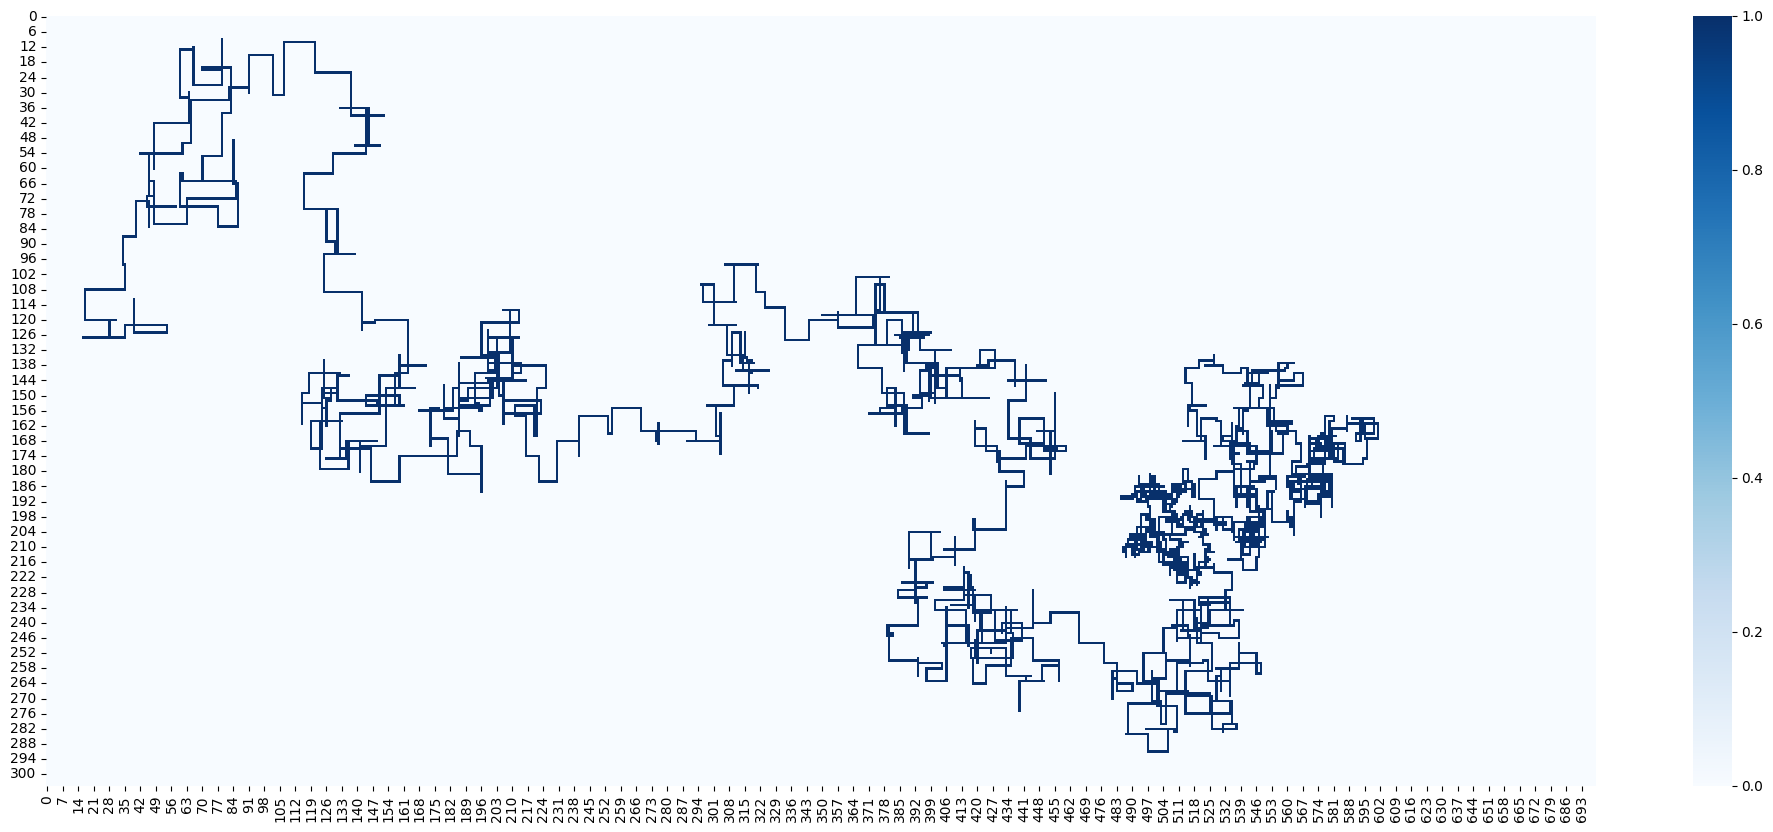

In [12]:
fig, ax = plt.subplots(figsize=(25,10))         # Sample figsize in inches
p1 = sns.heatmap(head_array[15:320, 0:700], cmap="Blues", ax=ax)

In [ ]:
# p1 = sns.heatmap(head_array, cmap="Blues")
# p1 = sns.heatmap(head_array[170:230, 480:520], cmap="Blues")
# p1 = sns.heatmap(head_array[15:320, 0:700], cmap="Blues")

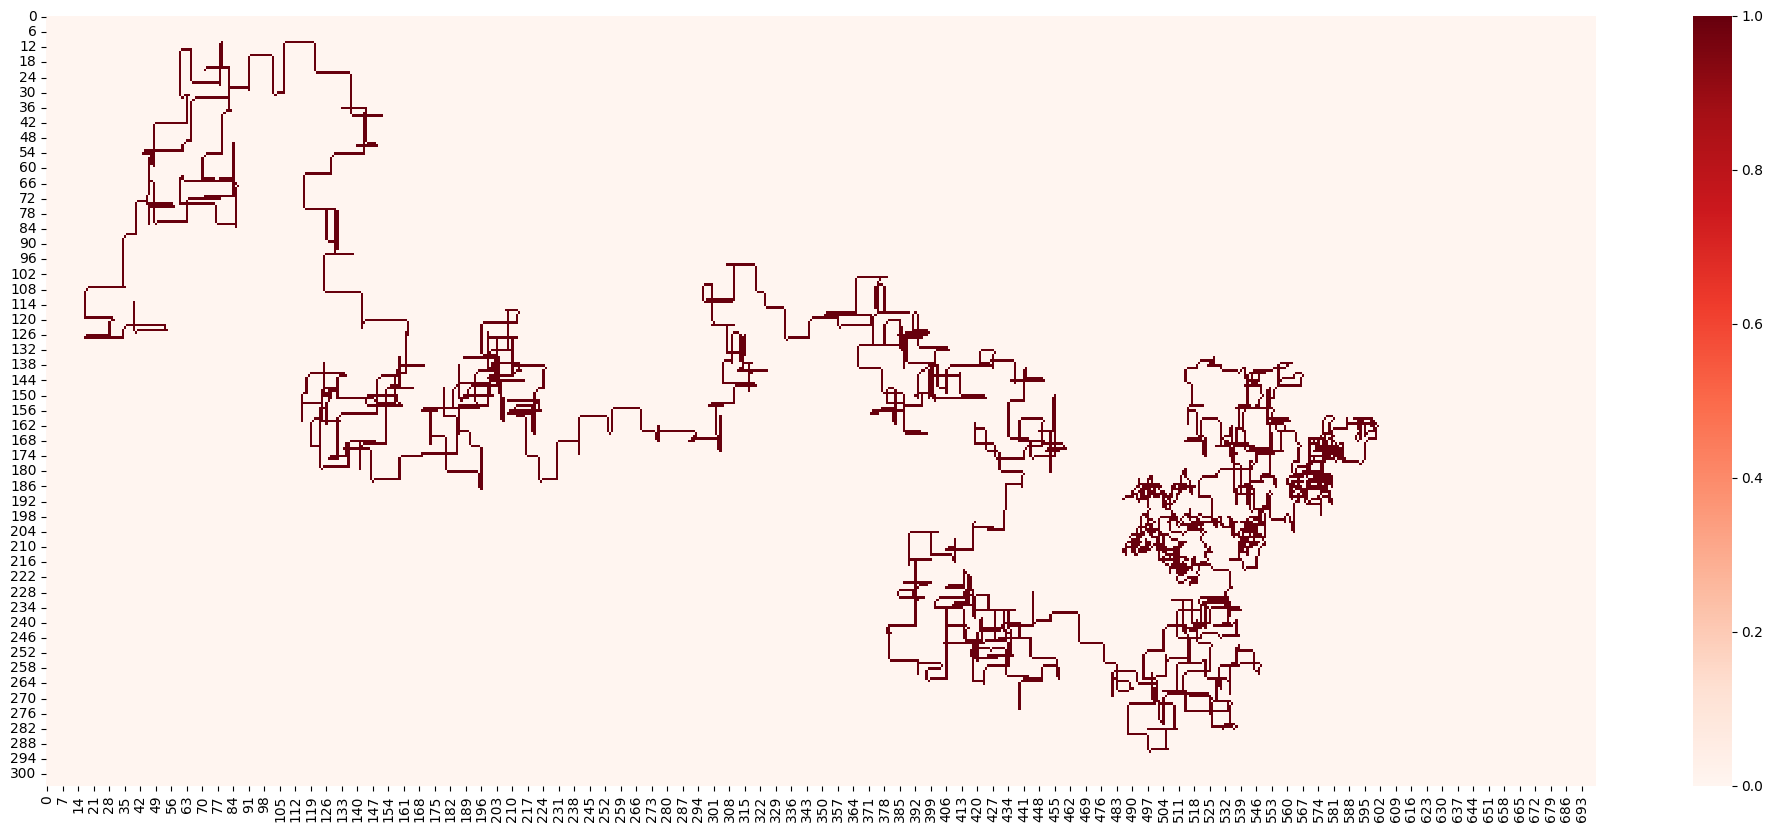

In [13]:
fig, ax = plt.subplots(figsize=(25,10))
# p2 = sns.heatmap(tail_array, cmap="Reds")
p2 = sns.heatmap(tail_array[15:320, 0:700], cmap="Reds", ax=ax)
# p2 = sns.heatmap(tail_array[0:200, 0:100], cmap="Reds", ax=ax)

### How many positions does the tail of the rope visit at least once?

In [14]:
tail_array.sum()

7090

#### ~~4070~~

~~That's not the right answer; your answer is too low. If you're stuck, make sure you're using the full input data; there are also some general tips on the about page, or you can ask for hints on the subreddit. Please wait one minute before trying again. (You guessed 4070.)~~

---

#### 7090

That's not the right answer; your answer is too high. If you're stuck, make sure you're using the full input data; there are also some general tips on the about page, or you can ask for hints on the subreddit. Please wait one minute before trying again. (You guessed 7090.)

---


In [15]:
head_array.sum()

7750

### Solution of Part 1 from Reddit

In [16]:
# import aocd
import numpy as np


def part_one():
    input = head_movements

    head = (0, 0)
    tail = (0, 0)
    visited = set()
    visited.add(tail)

    for motion in input:
        direction, steps = motion.split()
        for _ in range(int(steps)):
            match direction:
                case 'U':
                    head = (head[0], head[1] + 1)
                case 'D':
                    head = (head[0], head[1] - 1)
                case 'R':
                    head = (head[0] + 1, head[1])
                case 'L':
                    head = (head[0] - 1, head[1])
            diff_x = head[0] - tail[0]
            diff_y = head[1] - tail[1]
            if abs(diff_x) > 1 or abs(diff_y) > 1:
                tail = (tail[0] + np.sign(diff_x), tail[1] + np.sign(diff_y))
                visited.add(tail)
    return len(visited)


def main():
    print(part_one())


if __name__ == '__main__':
    main()

6745
